In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [85]:
df = pd.read_csv('guatedata.csv')

In [86]:
df.head()

,vedadc_n,vantig_n,vnline_n,vgamma_c,veaseg_c,vctcpl_n,vccdeu_n,vccdeu_n.1,ttkbco_n,vtarge_c
0,60.0,NaN,1,PREMIUM PLUS,n,45,1,1,2439779,0
1,66.0,NaN,1,ALTA,n,71,8,8,0,0
2,NaN,141.0,1,PREMIUM,n,73,25,25,0,0
3,116.0,NaN,2,NaN,n,7,0,0,0,0
4,50.0,NaN,3,ALTA,n,42,7,7,1969990,0


In [87]:
df.shape

(926, 10)

In [88]:
df.dtypes

vedadc_n      float64
vantig_n      float64
vnline_n        int64
vgamma_c       object
veaseg_c       object
vctcpl_n        int64
vccdeu_n        int64
vccdeu_n.1      int64
ttkbco_n        int64
vtarge_c        int64
dtype: object

In [89]:
#que columnas tiene valores nulos
df.isna().any()

vedadc_n       True
vantig_n       True
vnline_n      False
vgamma_c       True
veaseg_c      False
vctcpl_n      False
vccdeu_n      False
vccdeu_n.1    False
ttkbco_n      False
vtarge_c      False
dtype: bool

In [90]:
#cuantos valores nulos hay en cada columna
df.isna().sum()

vedadc_n      148
vantig_n      430
vnline_n        0
vgamma_c      192
veaseg_c        0
vctcpl_n        0
vccdeu_n        0
vccdeu_n.1      0
ttkbco_n        0
vtarge_c        0
dtype: int64

In [91]:
#rellenamos los valores nulos con el promedio
df = df.fillna(df.mean())

In [92]:
#eliminamos la variable vgamma_c(ganma del equipo) y la variable repetida vccdeu_n.1
df.drop(['vgamma_c', 'vccdeu_n.1'], axis=1, inplace=True)

In [93]:
df.head()

,vedadc_n,vantig_n,vnline_n,veaseg_c,vctcpl_n,vccdeu_n,ttkbco_n,vtarge_c
0,60.000000,101.177419,1,n,45,1,2439779,0
1,66.000000,101.177419,1,n,71,8,0,0
2,53.474293,141.000000,1,n,73,25,0,0
3,116.000000,101.177419,2,n,7,0,0,0
4,50.000000,101.177419,3,n,42,7,1969990,0


In [94]:
df['veaseg_c'] = df['veaseg_c'].replace(['no'], ['n'])
print(df['veaseg_c'].unique())

['n' 's']


In [95]:
df['veaseg_c'] = df['veaseg_c'].replace(['n', 's'], ['0','1'])
df['veaseg_c'] = df['veaseg_c'].astype(int)
print(df['veaseg_c'].unique())

[0 1]


In [96]:
df.dtypes

vedadc_n    float64
vantig_n    float64
vnline_n      int64
veaseg_c      int32
vctcpl_n      int64
vccdeu_n      int64
ttkbco_n      int64
vtarge_c      int64
dtype: object

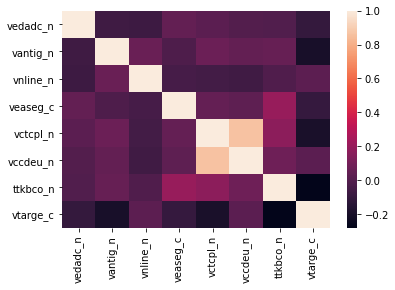

In [97]:
#Heatmap
import seaborn as sns
sns.heatmap(df.loc[:,['vedadc_n','vantig_n','vnline_n','veaseg_c', 'vctcpl_n', 'vccdeu_n', 'ttkbco_n', 'vtarge_c']].corr())
plt.show()

In [98]:
#Elimnamos las variables vantig_n, vctcpl_n, ttkbco_n, ya que tienen una menor correlacion con el target
df.drop(['vantig_n','vctcpl_n', 'ttkbco_n'], axis=1, inplace=True)

In [99]:
df.head()

,vedadc_n,vnline_n,veaseg_c,vccdeu_n,vtarge_c
0,60.000000,1,0,1,0
1,66.000000,1,0,8,0
2,53.474293,1,0,25,0
3,116.000000,2,0,0,0
4,50.000000,3,0,7,0


In [100]:
df.shape

(926, 5)

In [101]:
#Objetivo del negocio: Reducir la tasa de clientes que migran.
#Objetivo del data mining: Crear un modelo que permita predecir qué clientes migrarán, en base a la data brindada por la empresa de telecomunicaciones.

In [102]:
#Separamos las variables en x e y
X = df[['vedadc_n','vnline_n','veaseg_c','vccdeu_n']]
y = df['vtarge_c'] #target

In [103]:
#dividmos la data en data de entrenamiento y de test con un promedio de 80% y 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [104]:
#Normalizamos la data
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [105]:
#Implementar la Red Neuronal 
classifier = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=500, alpha=0.0001,
                     solver='adam', random_state=21,tol=0.000000001).fit(X_train, y_train)

D:\Programas\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [106]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [108]:
#curva ROC
y_pred_prob = classifier.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc: ', roc_auc)

roc:  0.7938075537168024


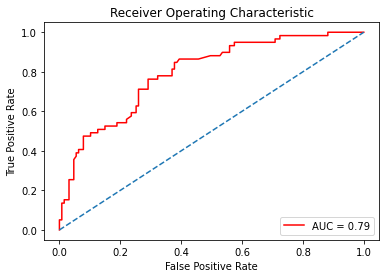

In [109]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [110]:
#Presentar la matriz de datos final
dataf = pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred),pd.DataFrame(y_pred_prob)],axis=1)
dataf.columns = ['vedadc_n','vnline_n','veaseg_c','vccdeu_n', 'vtarge_c','vtarge_c_Pred', 'vtarge_c_Pred_Prob_0', 'vtarge_c_Pred_Prob_1']
dataf.head(10)

,vedadc_n,vnline_n,veaseg_c,vccdeu_n,vtarge_c,vtarge_c_Pred,vtarge_c_Pred_Prob_0,vtarge_c_Pred_Prob_1
0,0.475192,0.806855,-0.14825,-0.423213,0,0,0.898632,0.101368
1,0.161211,0.074782,-0.14825,-0.308465,0,0,0.830094,0.169906
2,1.237717,-0.657292,-0.14825,-0.652711,0,0,0.961860,0.038140
3,0.003068,1.538929,-0.14825,-0.537962,1,0,0.727274,0.272726
4,-1.363838,-0.657292,-0.14825,-0.423213,1,1,0.223669,0.776331
5,-0.197624,-0.657292,-0.14825,0.150531,0,0,0.708954,0.291046
6,0.430338,-0.657292,-0.14825,-0.652711,0,0,0.929119,0.070881
7,0.430338,3.003076,-0.14825,-0.652711,0,0,0.843695,0.156305
8,0.385483,-0.657292,-0.14825,-0.652711,0,0,0.923181,0.076819
9,0.071502,-0.657292,-0.14825,0.035782,0,0,0.814320,0.185680


In [111]:
import pickle

In [112]:
#save model
model_saved_ann = 'model_ann_pred.pkl'
pickle.dump(classifier, open(model_saved_ann, 'wb'))

In [113]:
# load the model from disk
loaded_model = pickle.load(open(model_saved_ann, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7634408602150538
